In [1]:
# I want to predict the expected dolar mep value for Argentina for the following 3 months.

# Libraries

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load datasets.

In [3]:
# https://www.rava.com/perfil/DOLAR%20MEP
# Dolar mep
dolar_mep = pd.read_csv('../src/data/dolar_mep.csv', parse_dates=['fecha'])

# Load the dataset.
dolar_mep

,especie,ultimo,variacion,anterior,apertura,minimo,maximo,varMTD,varYTD,var6M,var12M,fecha,hora,cierre,timestamp,volumen
0,DOLAR MEP,36.97,NaN,NaN,36.97,36.97,36.97,NaN,NaN,NaN,NaN,2018-10-29,NaN,36.97,1540782000,0
1,DOLAR MEP,36.63,0.0,0.00,36.63,36.63,36.63,NaN,NaN,NaN,NaN,2018-10-30,19:59,36.63,1540868400,0
2,DOLAR MEP,35.93,0.0,0.00,35.93,35.93,35.93,NaN,NaN,NaN,NaN,2018-10-31,19:59,35.93,1540954800,0
3,DOLAR MEP,35.89,0.0,0.00,35.89,35.89,35.89,NaN,NaN,NaN,NaN,2018-11-01,19:59,35.89,1541041200,0
4,DOLAR MEP,35.66,0.0,0.00,35.66,35.66,35.66,NaN,NaN,NaN,NaN,2018-11-02,19:59,35.66,1541127600,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1344,DOLAR MEP,467.03,0.0,466.98,466.98,466.98,479.60,NaN,NaN,NaN,NaN,2023-06-01,19:59,467.03,1685588400,0
1345,DOLAR MEP,469.09,0.4,467.03,467.03,467.03,477.75,NaN,NaN,NaN,NaN,2023-06-02,19:59,469.09,1685674800,0
1346,DOLAR MEP,472.29,0.7,469.09,469.09,469.09,478.78,NaN,NaN,NaN,NaN,2023-06-05,19:59,472.29,1685934000,0
1347,DOLAR MEP,471.80,-0.1,472.29,472.29,471.80,484.94,NaN,NaN,NaN,NaN,2023-06-06,19:59,471.80,1686020400,0


In [4]:
# https://datos.gob.ar/series/api/series/?ids=168.1_T_CAMBIOR_D_0_0_26
# Dolar oficial
dolar_oficial = pd.read_csv('../src/data/cambio_oficial.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
dolar_oficial

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,2023-04-26,227.5,221.5517,221.57,NaN,468.015666,222.57,1642496.0,243.05,1724660.0,270.9,334533.0,299.6,280168.0,356.5,81196.0,394.6,47791.0
7723,2023-04-27,228.5,222.0200,222.00,NaN,460.017422,222.59,1389935.0,242.90,2044085.0,270.9,361842.0,300.1,281104.0,358.0,79750.0,397.5,47729.0
7724,2023-04-28,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0
7725,2023-04-29,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0


In [5]:
# https://datos.gob.ar/series/api/series/?ids=89.2_TS_INTE_PM_0_D_16
# Tasa interes
tasa_interes = pd.read_csv('../src/data/tasa_interes.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
tasa_interes

,indice_tiempo,tasas_interes_call,tasas_interes_badlar,tasas_interes_pm
0,2003-01-02,6.0172,25.3125,NaN
1,2003-01-03,6.0455,21.7500,NaN
2,2003-01-04,6.0455,21.7500,NaN
3,2003-01-05,6.0455,21.7500,NaN
4,2003-01-06,5.9506,20.2500,NaN
...,...,...,...,...
7419,2023-04-26,72.0900,76.3750,81.0
7420,2023-04-27,68.2100,76.2500,91.0
7421,2023-04-28,82.5500,87.5000,91.0
7422,2023-04-29,82.5500,87.5000,91.0


In [6]:
# Series monetarias
series_monetarias = pd.read_csv('../src/data/series_monetarias.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
series_monetarias

,indice_tiempo,reservas_internacionales_bcra_saldos,reservas_internacionales_bcra_prom_mensual_de_saldos_diarios,tipo_de_cambio_moneda_de_cada_momento,tipo_de_cambio_en_pesos_equivalentes,agregados_monetarios_en_pesos_bym_totales,agregados_monetarios_en_pesos_bym_en_circulacion,agregados_monetarios_en_pesos_bym_en_entidades,agregados_monetarios_en_pesos_bm,agregados_monetarios_en_pesos_m1,...,tasa_interes_deposito_plazo_fijo_30_59d_usd,tasa_interes_obligaciones_entidades_financieras_exterior,tasa_interes_prestamos_interfinancieros_hasta_15d_pesos,tasa_interes_prestamos_interfinancieros_hasta_15d_plazo_usd,tasa_interes_prestamos_empresas_primera_linea_30d_pesos,tasa_interes_prestamos_empresas_primera_linea_30d_plazo_usd,tasa_interes_adelantos_en_cc_sect_priv_no_financiero_pesos,tasa_interes_adelantos_en_cc_al_sect_priv_no_financiero_usd,tasa_interes_prestamos_hipot_sect_priv_5_10_anios_pesos,tasa_interes_prestamos_hipotecarios_sect_priv_5_10_anios_usd
0,1940-01-01,492.8,NaN,4.3952,4.395200e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1940-02-01,490.1,NaN,4.3042,4.304200e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1940-03-01,495.4,NaN,4.2805,4.280500e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1940-04-01,494.9,NaN,4.3514,4.351400e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1940-05-01,496.5,NaN,4.4167,4.416700e-13,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,2022-11-01,38008.9,37897.116667,167.2550,1.672550e+02,3428839.0,3052613.0,376226.0,4507746.0,7202245.0,...,0.337072,65.90,74.51,61.22,NaN,NaN,0.0,NaN,0.0,0.0
995,2022-12-01,44598.4,40518.700000,177.1283,1.771283e+02,4094595.0,3720035.0,374560.0,5203752.0,8500802.0,...,0.332704,67.51,75.43,61.42,NaN,NaN,0.0,NaN,0.0,0.0
996,2023-01-01,41417.0,43039.445161,186.8750,1.868750e+02,4063357.0,3661664.0,401693.0,5316722.0,8168559.0,...,0.323444,66.73,76.75,61.44,NaN,NaN,0.0,NaN,0.0,0.0
997,2023-02-01,38709.0,39842.785714,197.1533,1.971533e+02,4072337.0,3620436.0,451901.0,5219956.0,8601859.0,...,0.323994,66.48,77.69,64.21,NaN,NaN,0.0,NaN,0.0,0.0


In [7]:
# https://datos.gob.ar/series/api/series/?ids=148.3_INIVELNAL_DICI_M_26
# Inflacion - IPC
inflacion = pd.read_csv('../src/data/ipc.csv', parse_dates=['indice_tiempo'])

# Load the dataset.
inflacion

,indice_tiempo,ipc_nivel_general_nacional,ipc_estacionales_nacional,ipc_nucleo_nacional,ipc_regulados_nacional,ipc_nivel_general_gba,ipc_estacionales_gba,ipc_nucleo_gba,ipc_regulados_gba,ipc_nivel_general_pampeana,...,ipc_nucleo_noa,ipc_regulados_noa,ipc_nivel_general_cuyo,ipc_estacionales_cuyo,ipc_nucleo_cuyo,ipc_regulados_cuyo,ipc_nivel_general_patagonia,ipc_estacionales_patagonia,ipc_nucleo_patagonia,ipc_regulados_patagonia
0,2016-12-01,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,...,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000,100.0000
1,2017-01-01,101.5859,101.6969,101.5039,101.8183,101.3130,101.5562,101.3389,101.1274,101.7874,...,101.4339,102.2777,101.7074,100.6608,101.7235,102.2456,102.5593,100.6843,101.8374,106.1556
2,2017-02-01,103.6859,102.3345,103.2105,105.9316,103.8085,102.0783,103.2097,106.3489,103.5312,...,102.9705,106.6823,103.2652,100.3694,103.1488,105.2775,104.2827,101.1740,103.5240,108.7652
3,2017-03-01,106.1476,104.7868,105.2057,110.0057,106.2627,105.8790,105.0891,109.8871,105.8173,...,105.2640,115.9572,105.9238,102.0721,105.2127,110.4082,106.5167,102.5219,105.2611,113.2246
4,2017-04-01,108.9667,108.1867,107.4270,114.4649,109.0613,108.5334,107.4973,113.8991,108.6912,...,107.4536,121.2229,109.4506,106.6856,107.6553,116.8444,108.6517,105.1970,107.0217,116.2906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,2022-12-01,1134.5875,1413.2059,1153.5771,925.7853,1114.5359,1458.6084,1143.2887,875.0145,1145.8755,...,1157.9243,994.1478,1171.7081,1342.0507,1193.6664,1004.2244,1115.8852,1255.5574,1123.6997,1003.2345
73,2023-01-01,1202.9790,1525.1043,1215.3182,991.5192,1180.9670,1548.1443,1206.5221,940.4446,1215.4751,...,1220.6357,1048.4727,1246.1488,1454.9387,1259.7424,1084.1481,1181.5995,1331.1515,1185.3976,1076.4134
74,2023-02-01,1282.7091,1575.9625,1308.7788,1042.4951,1259.9952,1614.4139,1297.0224,991.4786,1292.6662,...,1332.5231,1092.8926,1329.9144,1482.4021,1363.9280,1133.3342,1249.6345,1387.6967,1264.2391,1115.0427
75,2023-03-01,1381.1601,1722.9662,1403.1434,1128.8908,1358.4995,1796.6041,1385.6929,1081.2155,1393.7727,...,1438.1088,1186.9610,1434.4221,1578.0293,1476.7792,1215.7424,1336.6514,1499.6039,1347.8468,1198.2039


# Handle the datasets

## Dolar mep.

In [8]:
# Check the columns for dollar mep.
dolar_mep.columns

Index(['especie', 'ultimo', 'variacion', 'anterior', 'apertura', 'minimo',
       'maximo', 'varMTD', 'varYTD', 'var6M', 'var12M', 'fecha', 'hora',
       'cierre', 'timestamp', 'volumen'],
      dtype='object')

In [9]:
# The data is daily we need to group by month.
# Create dolar_mep_mes.
# Group by month and get the mean.
# Keep only fecha and cierre.
dolar_mep_mes = dolar_mep[['fecha', 'cierre']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [10]:
# See the last 5 rows.
dolar_mep_mes.tail()

,cierre
fecha,
2023-02-28,355.578889
2023-03-31,379.089545
2023-04-30,413.428889
2023-05-31,446.263000
2023-06-30,472.382000


## Dolar oficial.

In [11]:
# Check the columns for dollar oficial.
dolar_oficial.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor', 'tipo_cambio_a3500',
       'tipo_cambio_mae', 'volumen_mae', 'tipo_cambio_implicito_en_adrs',
       'futuro_rofex_usd1m', 'interes_abierto_1m', 'futuro_rofex_usd2m',
       'interes_abierto_2m', 'futuro_rofex_usd3m', 'interes_abierto_3m',
       'futuro_rofex_usd4m', 'interes_abierto_4m', 'futuro_rofex_usd5m',
       'interes_abierto_5m', 'futuro_rofex_usd6m', 'interes_abierto_6m'],
      dtype='object')

In [12]:
dolar_oficial

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_a3500,tipo_cambio_mae,volumen_mae,tipo_cambio_implicito_en_adrs,futuro_rofex_usd1m,interes_abierto_1m,futuro_rofex_usd2m,interes_abierto_2m,futuro_rofex_usd3m,interes_abierto_3m,futuro_rofex_usd4m,interes_abierto_4m,futuro_rofex_usd5m,interes_abierto_5m,futuro_rofex_usd6m,interes_abierto_6m
0,2002-03-05,NaN,1.9917,NaN,NaN,2.180124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-03-06,NaN,2.0508,NaN,NaN,2.222222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002-03-07,NaN,2.1375,NaN,NaN,2.343949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-03-08,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002-03-09,NaN,2.2033,NaN,NaN,2.227778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,2023-04-26,227.5,221.5517,221.57,NaN,468.015666,222.57,1642496.0,243.05,1724660.0,270.9,334533.0,299.6,280168.0,356.5,81196.0,394.6,47791.0
7723,2023-04-27,228.5,222.0200,222.00,NaN,460.017422,222.59,1389935.0,242.90,2044085.0,270.9,361842.0,300.1,281104.0,358.0,79750.0,397.5,47729.0
7724,2023-04-28,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0
7725,2023-04-29,229.0,222.5750,222.68,NaN,453.689236,222.58,1389935.0,242.85,2504393.0,271.3,460320.0,301.0,289611.0,359.0,79347.0,399.6,48335.0


In [13]:
# The data is daily we need to group by month.
# Create dolar_oficial_mes.
# Group by month and get the mean.
# Keep only indice_tiempo and tipo_cambio_a3500.
dolar_oficial_mes = dolar_oficial[['indice_tiempo', 'tipo_cambio_bna_vendedor']].groupby(pd.Grouper(key='indice_tiempo', freq='M')).mean()

In [14]:
# Rename indice_tiempo as fecha.
dolar_oficial_mes.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

## Tasa interes.

In [15]:
# Check the columns for tasa_interes.
tasa_interes.columns

Index(['indice_tiempo', 'tasas_interes_call', 'tasas_interes_badlar',
       'tasas_interes_pm'],
      dtype='object')

In [16]:
# Rename indice_tiempo as fecha.
tasa_interes.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

In [17]:
# The data is daily we need to group by month.
# Create tasa_interes_mes.
# Group by month and get the mean.
# Keep only fecha and tasas_interes_badlar.
tasa_interes_mes = tasa_interes[['fecha', 'tasas_interes_badlar']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [18]:
tasa_interes_mes

,tasas_interes_badlar
fecha,
2003-01-31,16.239583
2003-02-28,21.042411
2003-03-31,24.455645
2003-04-30,20.816667
2003-05-31,12.197581
...,...
2022-12-31,69.306452
2023-01-31,69.377016
2023-02-28,69.796875


## Series monetarias.

In [19]:
# Check the columns for series_monetarias.
series_monetarias.columns

Index(['indice_tiempo', 'reservas_internacionales_bcra_saldos',
       'reservas_internacionales_bcra_prom_mensual_de_saldos_diarios',
       'tipo_de_cambio_moneda_de_cada_momento',
       'tipo_de_cambio_en_pesos_equivalentes',
       'agregados_monetarios_en_pesos_bym_totales',
       'agregados_monetarios_en_pesos_bym_en_circulacion',
       'agregados_monetarios_en_pesos_bym_en_entidades',
       'agregados_monetarios_en_pesos_bm', 'agregados_monetarios_en_pesos_m1',
       'agregados_monetarios_en_pesos_m2', 'agregados_monetarios_en_pesos_m3',
       'agregados_usd_m1', 'agregados_usd_m2', 'agregados_usd_m3',
       'prestamos_totales_total', 'prestamos_totales_pesos',
       'prestamos_totales_usd', 'prestamos_al_sector_privado_total',
       'prestamos_al_sector_privado_pesos', 'prestamos_al_sector_privado_usd',
       'prestamos_al_sector_publico_total',
       'prestamos_al_sector_publico_pesos', 'prestamos_al_sector_publico_usd',
       'depositos_totales_total', 'depositos_

In [20]:
# Rename indice_tiempo as fecha.
series_monetarias.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

In [21]:
#   'agregados_monetarios_en_pesos_bym_totales',
#        'agregados_monetarios_en_pesos_bym_en_circulacion',
#        'agregados_monetarios_en_pesos_bym_en_entidades',
#        'agregados_monetarios_en_pesos_bm', 'agregados_monetarios_en_pesos_m1',
#        'agregados_monetarios_en_pesos_m2', 'agregados_monetarios_en_pesos_m3',
# 'agregados_usd_m1', 'agregados_usd_m2', 'agregados_usd_m3',
# 'depositos_totales_pesos',
#     'tasa_interes_deposito_caja_de_ahorro_pesos',
#        'tasa_interes_deposito_caja_de_ahorro_usd',
#        'tasa_interes_deposito_plazo_fijo_30_59d_pesos',
#        'tasa_interes_deposito_plazo_fijo_30_59d_usd',
# 'reservas_internacionales_bcra_saldos',
#        'reservas_internacionales_bcra_prom_mensual_de_saldos_diarios',

In [22]:
# Keep only fecha and agregados_monetarios_en_pesos_bym_totales.
series_monetarias_mes = series_monetarias[['fecha', 'agregados_monetarios_en_pesos_bym_totales']].groupby(pd.Grouper(key='fecha', freq='M')).mean()

In [23]:
# Drop null values.
series_monetarias_mes.dropna(inplace=True)

In [24]:
series_monetarias_mes

,agregados_monetarios_en_pesos_bym_totales
fecha,
1940-06-30,1.437700e-10
1940-07-31,1.436300e-10
1940-08-31,1.420000e-10
1940-09-30,1.393000e-10
1940-10-31,1.382700e-10
...,...
2022-11-30,3.428839e+06
2022-12-31,4.094595e+06
2023-01-31,4.063357e+06


## Inflacion.

In [25]:
# Check the columns for Inflacion.
inflacion.columns

Index(['indice_tiempo', 'ipc_nivel_general_nacional',
       'ipc_estacionales_nacional', 'ipc_nucleo_nacional',
       'ipc_regulados_nacional', 'ipc_nivel_general_gba',
       'ipc_estacionales_gba', 'ipc_nucleo_gba', 'ipc_regulados_gba',
       'ipc_nivel_general_pampeana', 'ipc_estacionales_pampeana',
       'ipc_nucleo_pampeana', 'ipc_regulados_pampeana',
       'ipc_nivel_general_nea', 'ipc_estacionales_nea', 'ipc_nucleo_nea',
       'ipc_regulados_nea', 'ipc_nivel_general_noa', 'ipc_estacionales_noa',
       'ipc_nucleo_noa', 'ipc_regulados_noa', 'ipc_nivel_general_cuyo',
       'ipc_estacionales_cuyo', 'ipc_nucleo_cuyo', 'ipc_regulados_cuyo',
       'ipc_nivel_general_patagonia', 'ipc_estacionales_patagonia',
       'ipc_nucleo_patagonia', 'ipc_regulados_patagonia'],
      dtype='object')

In [26]:
# Keep only, indice_tiempo and ipc_nivel_general_nacional.
inflacion = inflacion[['indice_tiempo', 'ipc_nivel_general_nacional']]

In [27]:
# Create a new column for inflacion.
# It will divide the current ipc_nivel_general_nacional value by the previous one.
inflacion['inflacion'] = inflacion['ipc_nivel_general_nacional'].pct_change()

# Rename indice_tiempo to fecha.
inflacion.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)

C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\3005815646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion['inflacion'] = inflacion['ipc_nivel_general_nacional'].pct_change()
C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\3005815646.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion.rename(columns={'indice_tiempo': 'fecha'}, inplace=True)


In [28]:
# Check the dataset.
inflacion

,fecha,ipc_nivel_general_nacional,inflacion
0,2016-12-01,100.0000,NaN
1,2017-01-01,101.5859,0.015859
2,2017-02-01,103.6859,0.020672
3,2017-03-01,106.1476,0.023742
4,2017-04-01,108.9667,0.026558
...,...,...,...
72,2022-12-01,1134.5875,0.051246
73,2023-01-01,1202.9790,0.060279
74,2023-02-01,1282.7091,0.066277
75,2023-03-01,1381.1601,0.076752


# Understanding the data

## Shape

In [29]:
# Print the shapes of the 5 datasets.
print(dolar_mep_mes.shape)
print(dolar_oficial_mes.shape)
print(tasa_interes_mes.shape)
print(series_monetarias_mes.shape)
print(inflacion.shape)

(57, 1)
(254, 1)
(244, 1)
(994, 1)
(77, 3)


## Min and max dates

In [30]:
# Print the max and min dates for each dataset.
print(dolar_mep_mes.index.min(), dolar_mep_mes.index.max())
print(dolar_oficial_mes.index.min(), dolar_oficial_mes.index.max())
print(tasa_interes_mes.index.min(), tasa_interes_mes.index.max())
print(series_monetarias_mes.index.min(), series_monetarias_mes.index.max())
print(inflacion.fecha.min(), inflacion.fecha.max())

2018-10-31 00:00:00 2023-06-30 00:00:00
2002-03-31 00:00:00 2023-04-30 00:00:00
2003-01-31 00:00:00 2023-04-30 00:00:00
1940-06-30 00:00:00 2023-03-31 00:00:00
2016-12-01 00:00:00 2023-04-01 00:00:00


## Prune the data, from 2019-01-01.

In [31]:
# Prune the datasets to have the same dates.
# Set the minimum date to 2019-01-01.
# Not max date because we want to predict the next month.
dolar_mep_mes_2019 = dolar_mep_mes[dolar_mep_mes.index >= '2019-01-01']
dolar_oficial_mes_2019 = dolar_oficial_mes[dolar_oficial_mes.index >= '2019-01-01']
tasa_interes_mes_2019 = tasa_interes_mes[tasa_interes_mes.index >= '2019-01-01']
series_monetarias_mes_2019 = series_monetarias_mes[series_monetarias_mes.index >= '2019-01-01']
inflacion_2019 = inflacion[inflacion.fecha >= '2019-01-01']

## Prune the data, to the last month that the datasets have in common.

In [38]:
# Get the max date for each dataset, add to a list.
# Get the minimum of that list a set as max date for all datasets.
max_date = min([dolar_mep_mes_2019.index.max(), dolar_oficial_mes_2019.index.max(), tasa_interes_mes_2019.index.max(), series_monetarias_mes_2019.index.max(), inflacion_2019.fecha.max()])

# Prune the datasets as max date to max_date.
dolar_mep_mes_2019_max = dolar_mep_mes_2019[dolar_mep_mes_2019.index <= max_date]
dolar_oficial_mes_2019_max = dolar_oficial_mes_2019[dolar_oficial_mes_2019.index <= max_date]
tasa_interes_mes_2019_max = tasa_interes_mes_2019[tasa_interes_mes_2019.index <= max_date]
series_monetarias_mes_2019_max = series_monetarias_mes_2019[series_monetarias_mes_2019.index <= max_date]
inflacion_2019_max = inflacion_2019[inflacion_2019.fecha <= max_date]

In [43]:
# Check that the max date for the new 5 datasets is the same.
print(dolar_mep_mes_2019_max.index.max())
print(dolar_oficial_mes_2019_max.index.max())
print(tasa_interes_mes_2019_max.index.max())
print(series_monetarias_mes_2019_max.index.max())
print(inflacion_2019_max.fecha.max())

# I checked online and inflation for first day instead is last day of the month.
# Transform inflacion to the last day of the month.
inflacion_2019_max['fecha'] = inflacion_2019_max['fecha'] + pd.offsets.MonthEnd(0)

2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-31 00:00:00
2023-03-01 00:00:00


C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\2448003273.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflacion_2019_max['fecha'] = inflacion_2019_max['fecha'] + pd.offsets.MonthEnd(0)


In [46]:
# Check that the 5 datasets have the same max date.
print(dolar_mep_mes_2019_max.index.max() == dolar_oficial_mes_2019_max.index.max() == tasa_interes_mes_2019_max.index.max() == series_monetarias_mes_2019_max.index.max() == inflacion_2019_max.fecha.max())

True


# Plot the data

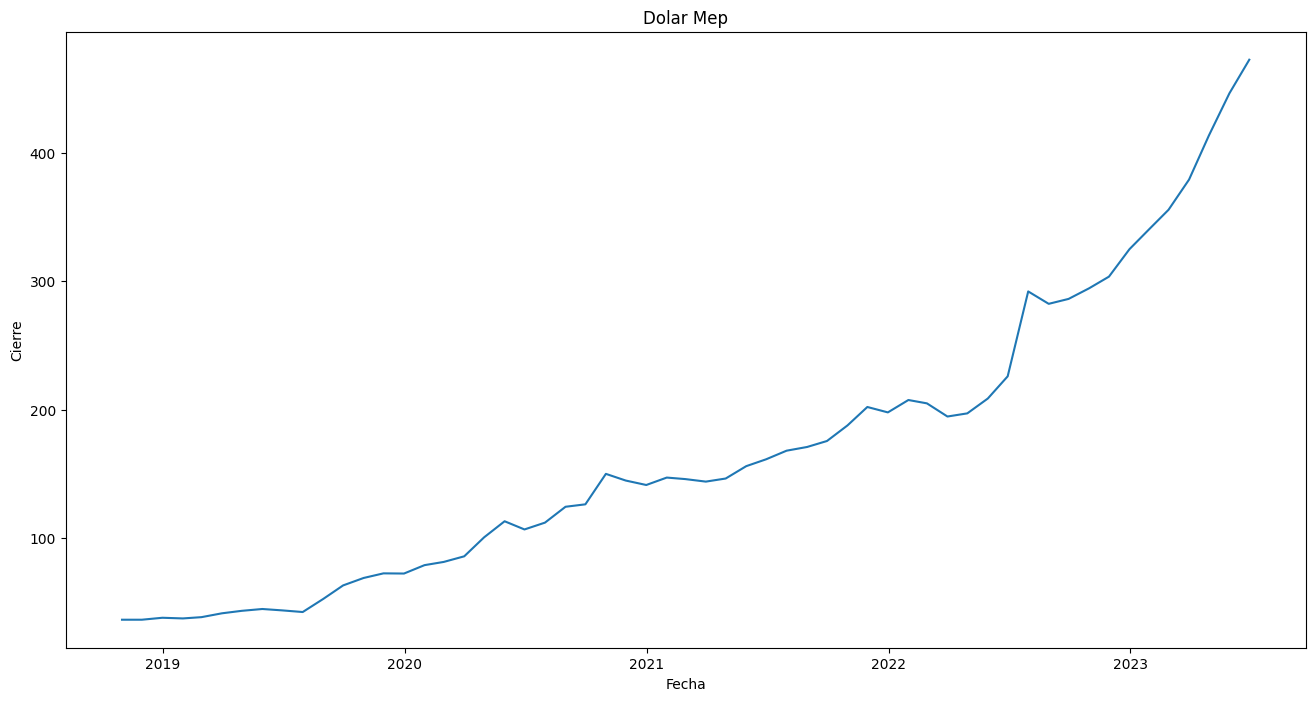

In [32]:
# Create a line chart for dollar_mep_mes, for fecha and cierre.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(dolar_mep_mes['cierre'])
plt.title('Dolar Mep')
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.show()

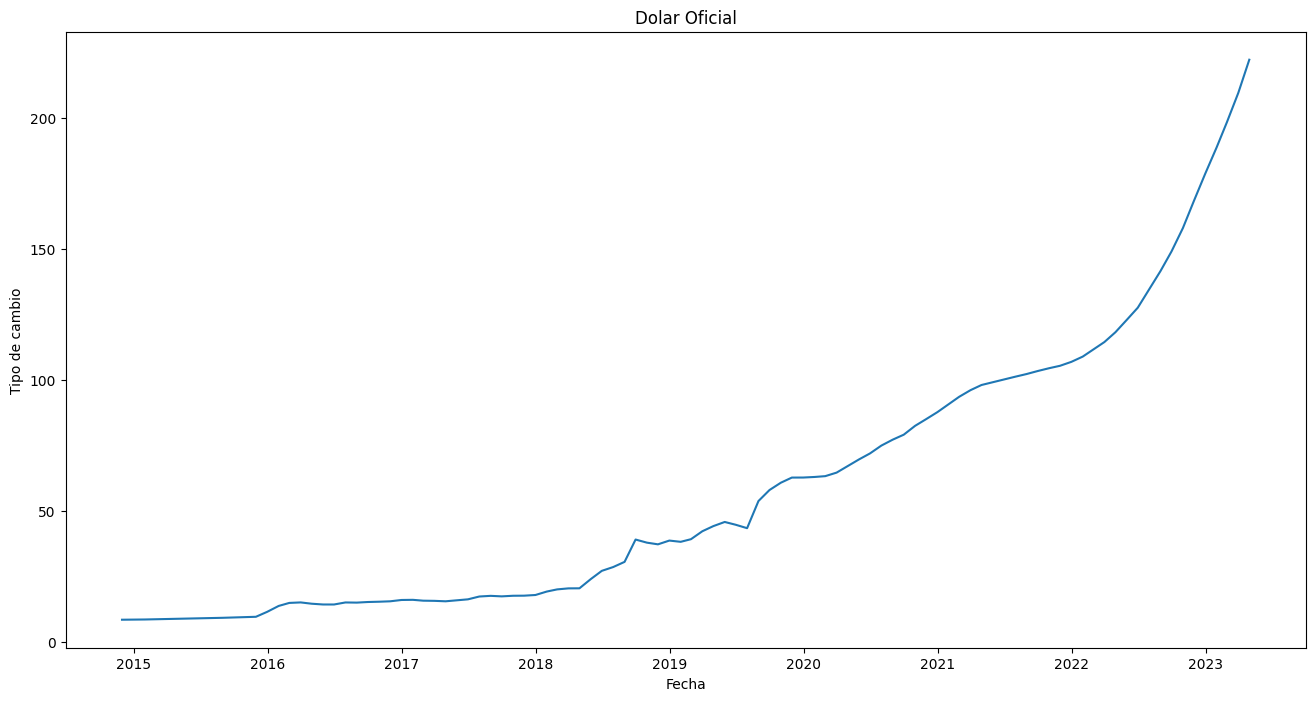

In [33]:
# Create a line chart for dollar_oficial_mes, for fecha and tipo_cambio_bna_vendedor.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(dolar_oficial_mes['tipo_cambio_bna_vendedor'])
plt.title('Dolar Oficial')
plt.xlabel('Fecha')
plt.ylabel('Tipo de cambio')
plt.show()

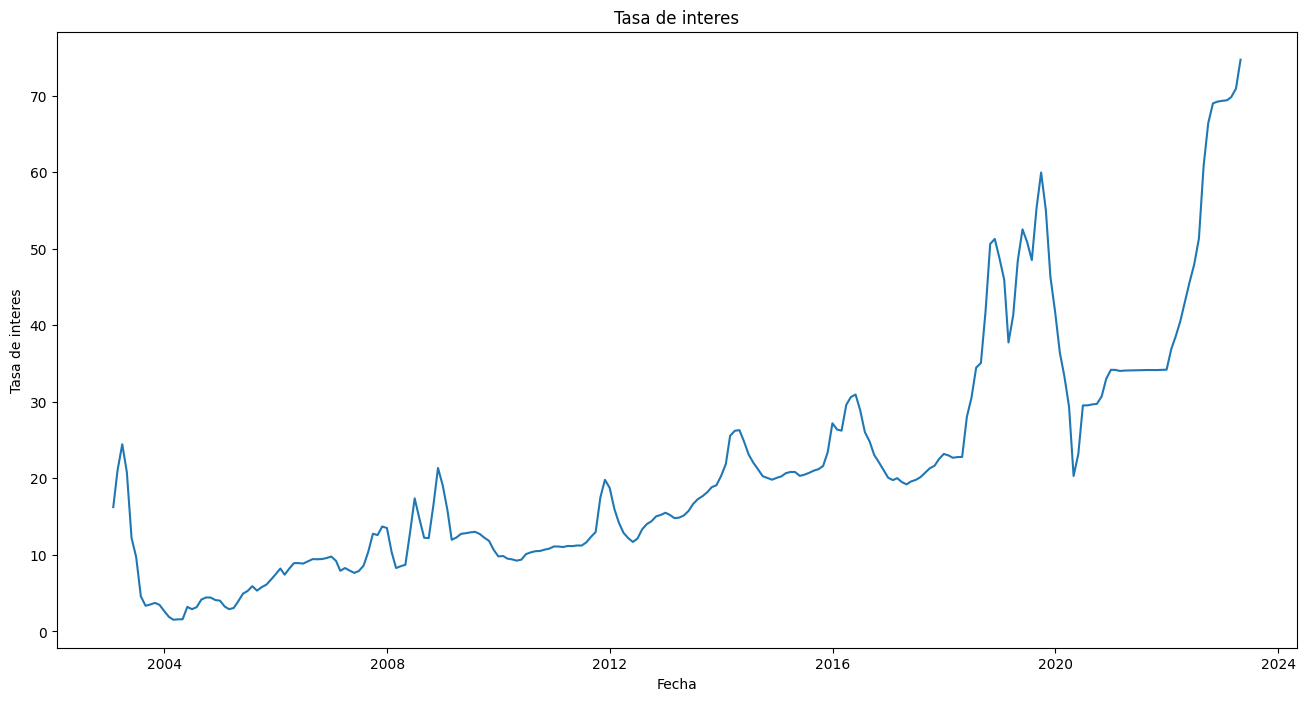

In [34]:
# Create a line chart for tasa_interes_mes, for fecha and tasas_interes_badlar.
# Set the size.
plt.figure(figsize=(16, 8))
plt.plot(tasa_interes_mes['tasas_interes_badlar'])
plt.title('Tasa de interes')
plt.xlabel('Fecha')
plt.ylabel('Tasa de interes')
plt.show()

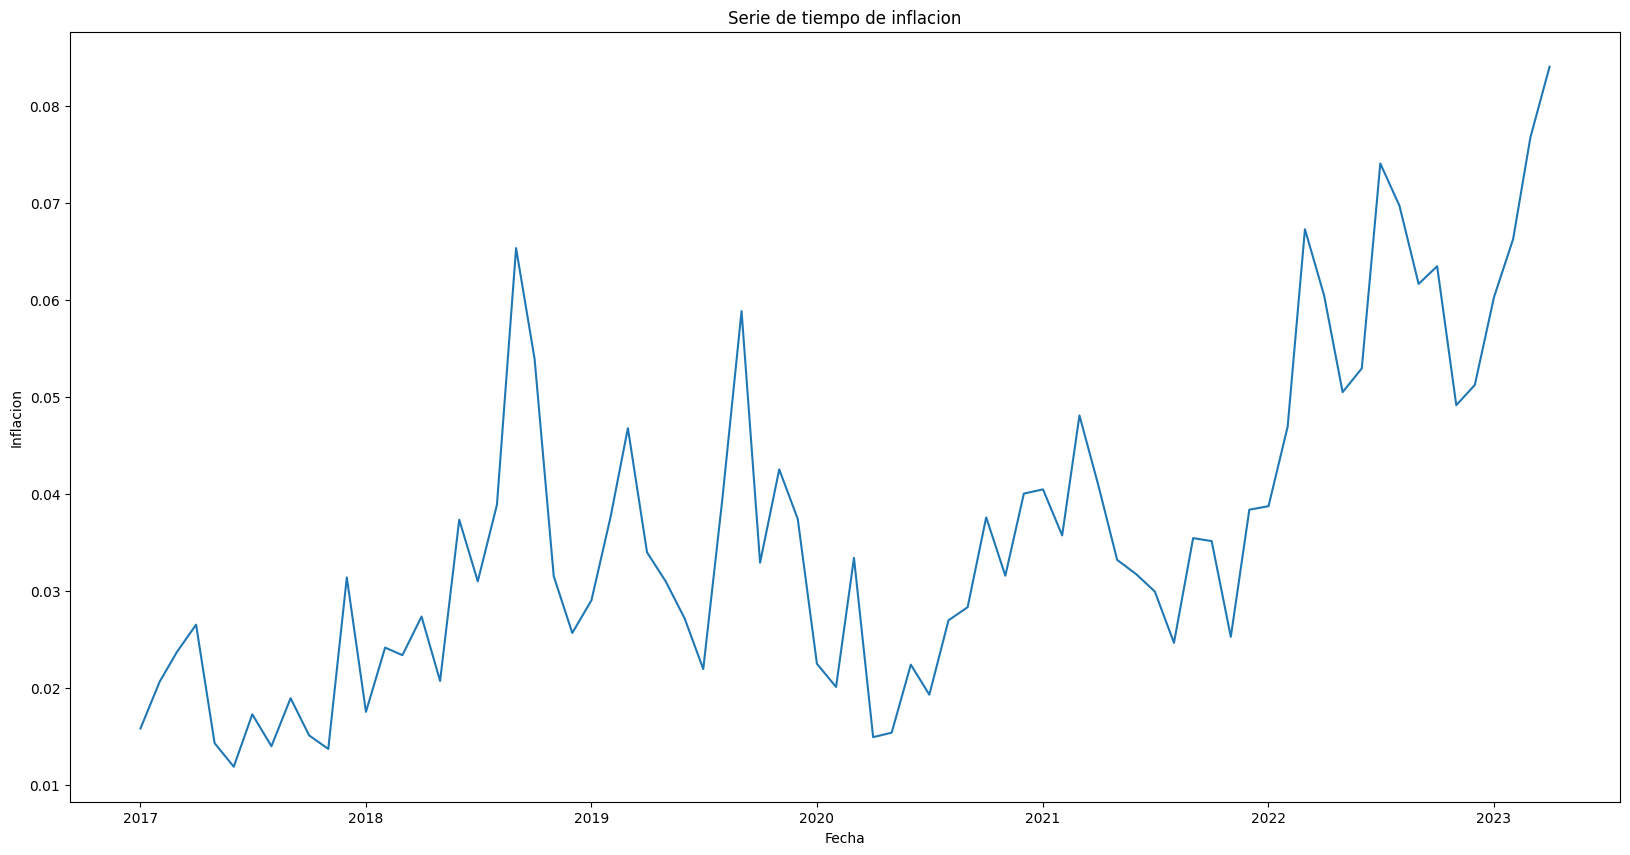

In [35]:
# Create a line chart for inflacion and indice_tiempo.
plt.figure(figsize=(20, 10))
plt.plot(inflacion['fecha'], inflacion['inflacion'])
plt.title('Serie de tiempo de inflacion')
plt.xlabel('Fecha')
plt.ylabel('Inflacion')
plt.show()

# Joining the data

## dolar_mep

In [48]:
# Rename cierre as value for dolar_mep_mes_2019_max.
# Create a new column called feature = dolar_mep
dolar_mep_mes_2019_max.rename(columns={'cierre': 'value'}, inplace=True)
dolar_mep_mes_2019_max['feature'] = 'dolar_mep'

# Print the new dataset.
dolar_mep_mes_2019_max

C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\2338910638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_mep_mes_2019_max.rename(columns={'cierre': 'value'}, inplace=True)
C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\2338910638.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_mep_mes_2019_max['feature'] = 'dolar_mep'


,value,feature
fecha,,
2019-01-31,37.515484,dolar_mep
2019-02-28,38.506786,dolar_mep
2019-03-31,41.507097,dolar_mep
2019-04-30,43.439333,dolar_mep
2019-05-31,44.856452,dolar_mep
2019-06-30,43.775000,dolar_mep
2019-07-31,42.498065,dolar_mep
2019-08-31,52.690645,dolar_mep
2019-09-30,63.212000,dolar_mep


In [51]:
# Scale the data, making value = 100 for the first row, make a new column called value_scaled.
# The rest will be the variation of the value based on the first row.
dolar_mep_mes_2019_max['value_scaled'] = dolar_mep_mes_2019_max['value'] / dolar_mep_mes_2019_max['value'].iloc[0] * 100

# Make a new column called variation.
# The first row will be 0, the rest will be the variation of the value based on the previous row.
dolar_mep_mes_2019_max['variation'] = dolar_mep_mes_2019_max['value_scaled'].pct_change()

C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\1233762392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_mep_mes_2019_max['value_scaled'] = dolar_mep_mes_2019_max['value'] / dolar_mep_mes_2019_max['value'].iloc[0] * 100
C:\Users\cfont\AppData\Local\Temp\ipykernel_20028\1233762392.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dolar_mep_mes_2019_max['variation'] = dolar_mep_mes_2019_max['value_scaled'].pct_change()


In [47]:
dolar_mep_mes_2019_max

,cierre
fecha,
2019-01-31,37.515484
2019-02-28,38.506786
2019-03-31,41.507097
2019-04-30,43.439333
2019-05-31,44.856452
2019-06-30,43.775000
2019-07-31,42.498065
2019-08-31,52.690645
2019-09-30,63.212000


In [ ]:
dolar_mep_mes_2019_max
print(dolar_oficial_mes_2019_max.index.max())
print(tasa_interes_mes_2019_max.index.max())
print(series_monetarias_mes_2019_max.index.max())
print(inflacion_2019_max.fecha.max())